# Creacion y prueba de la implementacion del algoritmo de descenso de gradiente

Se debe probara el algoritmo usando un dataset de 3 columnas y 1000 filas para las cuales se aplicara regresion sobre una de las variables generando una funcion de regresion de la forma $f(x) = w_1 x_1 + w_2 x_2 + w_0$.

In [4]:
import pandas as pd
import numpy as np
from Prediccion_model import Prediction_model

In [5]:
training_df = pd.DataFrame(columns=['var_a', 'var_b', 'var_c'])

n_values = 1000
#Coeficientes que deberia predecir el modelo como vector de pesos
training_df['var_a'] = np.random.rand(n_values)
training_df['var_b'] = np.random.rand(n_values)
training_df['var_c'] = np.random.rand(n_values)
training_df

,var_a,var_b,var_c
0,0.175218,0.571278,0.056930
1,0.093323,0.382359,0.170002
2,0.205111,0.784967,0.329525
3,0.523444,0.714900,0.713232
4,0.251135,0.703025,0.558872
...,...,...,...
995,0.428543,0.194458,0.732490
996,0.045531,0.401787,0.305343
997,0.817630,0.720018,0.430574
998,0.092539,0.833579,0.664403


Number of iterations: 10000
Sum of error during testing: 0.2508


<Figure size 640x1000 with 0 Axes>

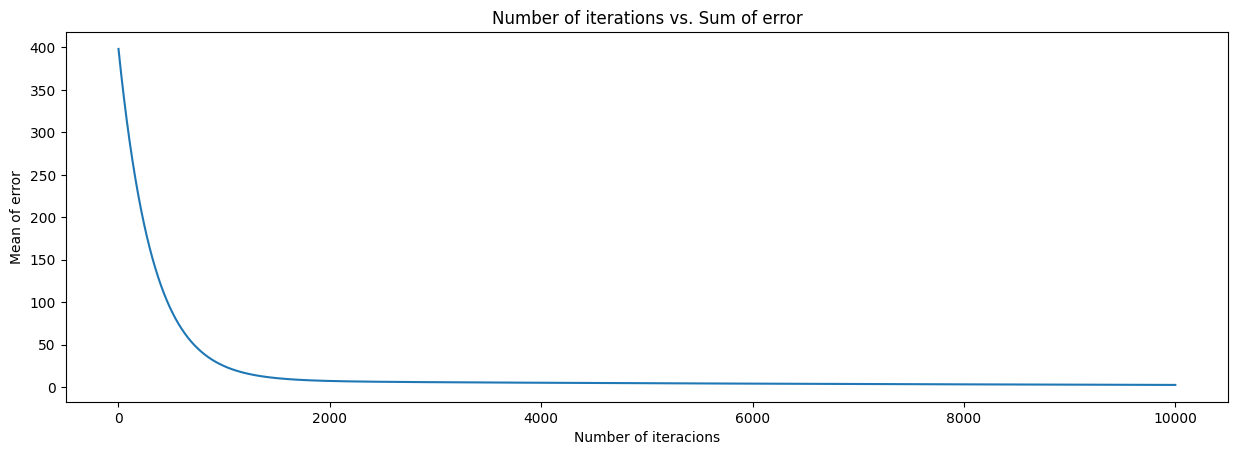

0    0.437384
1    0.046822
2    0.064994
dtype: float64

In [6]:
test = Prediction_model(data_set = training_df, 
                        dep_var='var_c', 
                        ind_vars=['var_a', 'var_b'])
test.get_model()